https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb <br/>
https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)
brain_pca = pd.read_csv('brain_stroke_after_pca.csv')
brain_pca = brain_pca.drop(brain_pca.columns[0], axis=1) 
print(brain)

      gender   age  hypertension  heart_disease  ever_married  \
0          0  67.0             0              1             1   
1          0  80.0             0              1             1   
2          1  49.0             0              0             1   
3          1  79.0             1              0             1   
4          0  81.0             0              0             1   
...      ...   ...           ...            ...           ...   
4976       0  41.0             0              0             0   
4977       0  40.0             0              0             1   
4978       1  45.0             1              0             1   
4979       0  40.0             0              0             1   
4980       1  80.0             1              0             1   

      avg_glucose_level   bmi  smoking_status  stroke  
0                228.69  36.6               2       1  
1                105.92  32.5               1       1  
2                171.23  34.4               3      

In [3]:
# Linear Regression

In [8]:
X = brain.iloc[:, :8]
y = brain.iloc[:, 8]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 0.04514472417313834


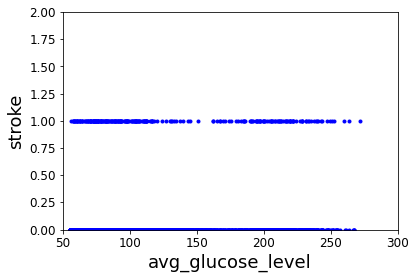

In [25]:
plt.plot(X.iloc[:, 5], y, "b.")
plt.xlabel("avg_glucose_level", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([50, 300, 0, 2])
plt.show()

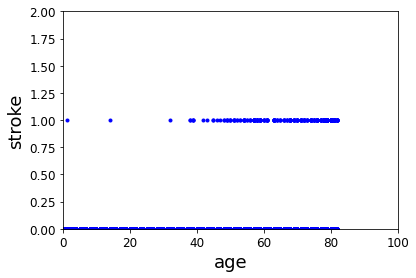

In [24]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("age", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([0, 100, 0, 2])
plt.show()

In [26]:
X = brain_pca.iloc[:, :2]
y = brain_pca.iloc[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = LinearRegression()
y_pred = linear.fit(X_train, y_train).predict(X_test)
print("MSE:",mean_squared_error(y_test,  y_pred))

MSE: 0.046745857214450195


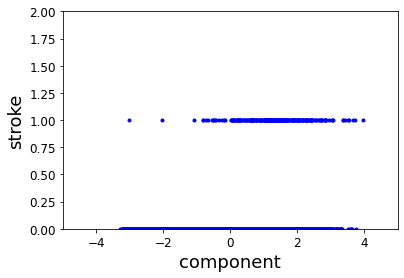

In [31]:
plt.plot(X.iloc[:, 0], y, "b.")
plt.xlabel("component 1", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

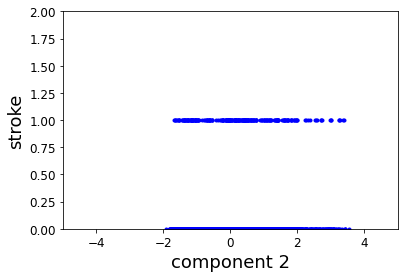

In [32]:
plt.plot(X.iloc[:, 1], y, "b.")
plt.xlabel("component 2", fontsize=18)
plt.ylabel("stroke", fontsize=18)
plt.axis([-5, 5, 0, 2])
plt.show()

In [6]:
# MSE lower on our big data set than on pca so we are going to use our dataset with numerical value
# But our dataset is a classification dataset, and the Linear Regression is not adapted to classification
# We can see this with the different graph (no ones have the possibility to apply a good  fit line)
# Our data is not really linear separable except if we apply an horizontal fit line (not a linear regression)